# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
employee = pd.read_csv ('../your_code/Employee.csv')

#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# group by method
employee.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [4]:
# pivot Table method
employee.pivot_table(index='Department', values='Salary', aggfunc='mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean')

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
employee.pivot_table(index=['Title'], values=['Years', 'Salary'], aggfunc={'Years': 'mean', 'Salary': 'mean'})

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
employee.pivot_table(index=['Department', 'Title'],values=['Salary', 'Name'],aggfunc={'Salary': 'mean', 'Name': 'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [8]:
# salaries are very similar independently of the department, except Associates in IT & Sales that present a small difference
# Median, Max and min mantain similar and constant values

table = employee.pivot_table(index=['Department', 'Title'],values='Salary',aggfunc=['median', 'min', 'max', 'std'])
table

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [9]:
table.fillna(0, inplace=True)
table

median    min    max       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70  0.000000
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60  0.000000
Sales      associate   55.0     55     55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
employee.pivot_table(index='Department',values=['Name', 'Salary'],aggfunc={'Name': 'count', 'Salary': 'sum'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [11]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [12]:
employee.pivot_table(index=['Department', 'Title'],values=['Years', 'Salary'],aggfunc={'Years' : 'sum', 'Salary' : 'mean'})


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [13]:
# your answer here

In [14]:
# your answer here

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [15]:
fitbit = pd.read_csv('../your_code/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [16]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
Calorie burned,367.0,2741.501362,916.307036,179.000,2698.000,2974.00,3233.00,4351.00
Steps,367.0,10121.588556,5594.836225,0.000,6730.500,10413.00,13916.50,26444.00
Distance,367.0,8.549128,3.409881,0.000,6.155,8.29,10.56,20.45
Floors,367.0,11.724796,10.337370,0.000,5.000,11.00,16.00,101.00
Minutes Sedentary,367.0,563.934482,294.793145,1.002,520.000,663.00,756.50,998.00
Minutes Lightly Active,367.0,236.405995,86.531376,0.000,179.000,226.00,290.00,472.00
Minutes Fairly Active,367.0,26.163488,20.319456,0.000,8.000,24.00,41.50,101.00
Minutes Very Active,367.0,35.722071,31.006682,0.000,10.500,29.00,54.00,153.00
Activity Calories,367.0,2044.147139,2041.267168,0.000,1218.500,1553.00,1927.50,9830.00
MinutesOfSleep,367.0,290.479564,154.752328,0.000,224.000,337.00,400.50,553.00


In [17]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [18]:
cols = ['Minutes Very Active', 'Steps']
df = fitbit[cols]
df.corr()

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

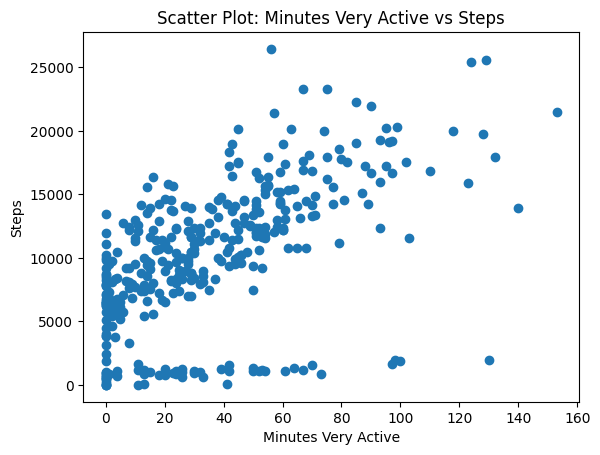

In [19]:
plt.scatter(x=df['Minutes Very Active'], y=df['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Scatter Plot: Minutes Very Active vs Steps')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [20]:
# There is high positive linear correlation between minutes very active and steps.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [21]:
cols = ['Minutes Sedentary', 'Steps']
df = fitbit[cols]
df.corr()

,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

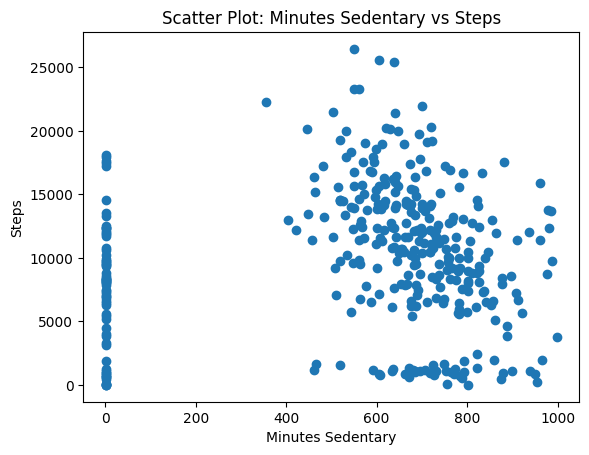

In [22]:
plt.scatter(x=df['Minutes Sedentary'], y=df['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Scatter Plot: Minutes Sedentary vs Steps')
plt.show()

In [23]:
# There is a negative correlation that implies that as minutes sedentary increases steps decrease.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [24]:
col = ['MinutesOfSleep', 'Steps']
df = fitbit[col]
df.corr()

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

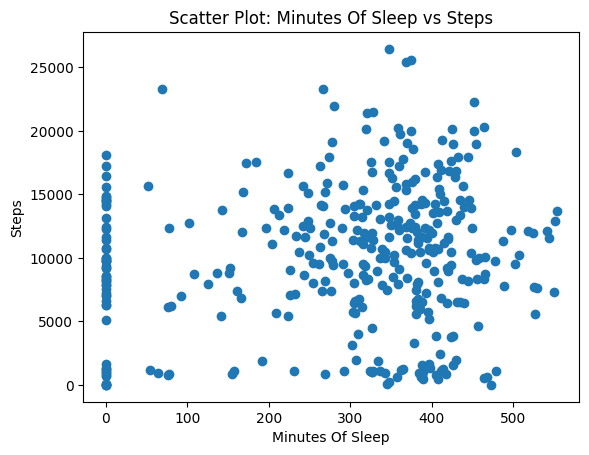

In [25]:
plt.scatter(x=df['MinutesOfSleep'], y=df['Steps'])
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.title('Scatter Plot: Minutes Of Sleep vs Steps')
plt.show()

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [26]:
columns= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[columns]

In [27]:
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [28]:
# The elements that have the most correlation have are 'Minutes Very Active' and 'Steps'

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [29]:
time_grades = pd.read_csv('../your_code/Time_Grades.csv')


In [30]:
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

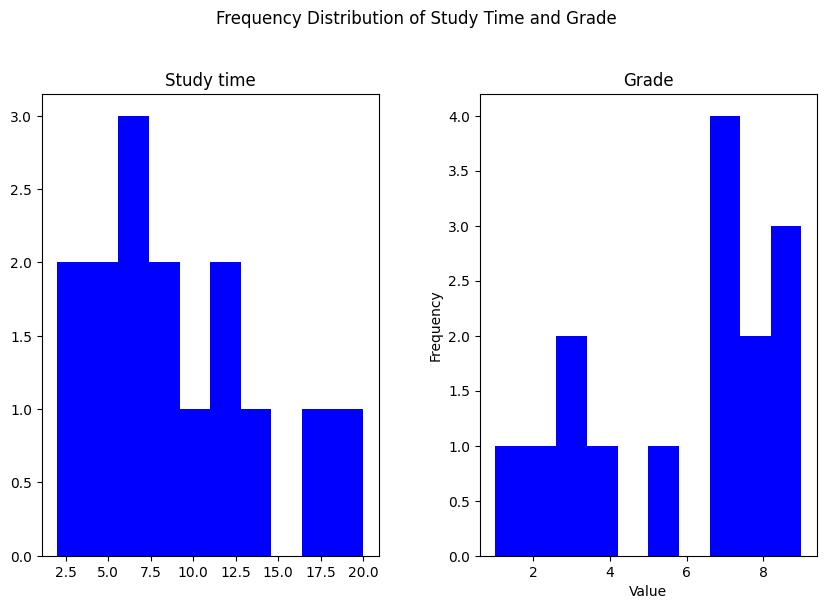

In [31]:
time_grades[['Study time', 'Grade']].hist(figsize=(10, 6), bins=10, grid=False, color=['blue'])
plt.suptitle("Frequency Distribution of Study Time and Grade", y=1.02)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [32]:
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')
pearson_corr

0.7980456073578858

In [33]:
spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')
spearman_corr

# There is a high correlation between notes and study

0.819658753036942

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

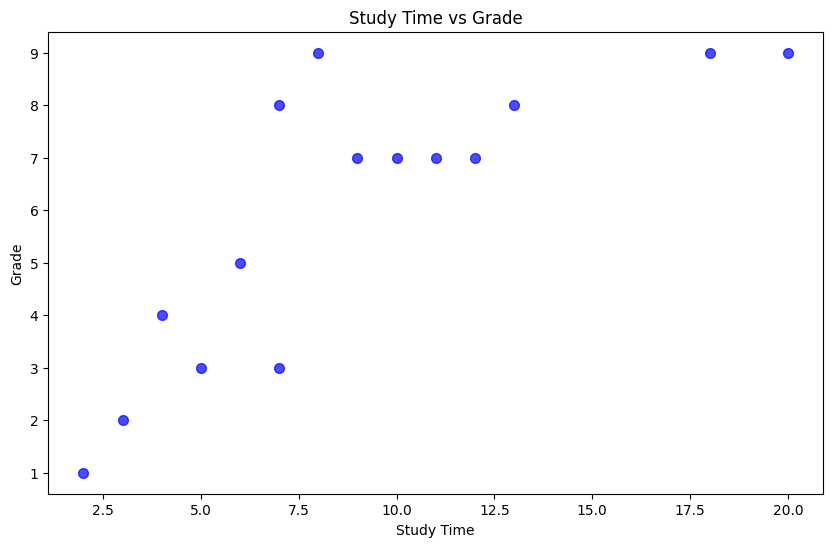

In [34]:
plt.figure(figsize=(10, 6))
plt.scatter(time_grades['Study time'], time_grades['Grade'], s=50, alpha=0.7, color='blue')
plt.title("Study Time vs Grade")
plt.xlabel("Study Time")
plt.ylabel("Grade")
plt.show()

In [35]:
# More study time is related to higher performance in grades. However we can note there are also outliers in our dataset

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [36]:
'''

Pearson Correlation:
Measures linear relationships in normally distributed data.

Spearman Correlation:
Measures monotonic relationships without assuming a specific distribution.

'''

'\n\nPearson Correlation:\nMeasures linear relationships in normally distributed data.\n\nSpearman Correlation:\nMeasures monotonic relationships without assuming a specific distribution.\n\n'